# IMPORT LIBRARIES

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data set
df = pd.read_csv("C:\\Cureya\\COVID STAT.csv")

In [3]:
#accesing first five datavalues
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7539,6,7404,129,0.08,98.21,1.71
1,Andhra Pradesh,1970008,20582,1936016,13410,1.04,98.27,0.68
2,Arunachal Pradesh,48565,3508,44823,234,7.22,92.29,0.48
3,Assam,568257,12429,550534,5294,2.19,96.88,0.93
4,Bihar,724917,401,714872,9644,0.06,98.61,1.33


In [4]:
#accesing last five datavalues
df.tail()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
31,Telengana,645997,8819,633371,3807,1.37,98.05,0.59
32,Tripura,79026,3104,75167,755,3.93,95.12,0.96
33,Uttar Pradesh,1708500,646,1685091,22763,0.04,98.63,1.33
34,Uttarakhand,342198,574,334261,7363,0.17,97.68,2.15
35,West Bengal,1529295,10803,1500331,18161,0.71,98.11,1.19


In [5]:
#shape of dataset
df.shape


(36, 8)

In [6]:
#all the columns in dataset
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

In [7]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [8]:
#checking the null values
df.isnull().any()

State/UTs              False
Total Cases            False
Active                 False
Discharged             False
Deaths                 False
Active Ratio (%)       False
Discharge Ratio (%)    False
Death Ratio (%)        False
dtype: bool

In [42]:
#checking the duplicate data in dataset
df.duplicated().sum()

0

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Cases,36.0,881291.861111,1.273276e+06,7539.00,64944.2500,457740.000,985417.250,6315063.00
Active,36.0,11248.833333,2.995749e+04,6.00,363.5000,1277.000,10061.250,165834.00
Discharged,36.0,858232.055556,1.231874e+06,7404.00,60583.7500,446194.500,967042.500,6103325.00
Deaths,36.0,11810.972222,2.284218e+04,4.00,797.0000,5211.500,13439.500,133038.00
Active Ratio (%),36.0,2.679722,5.706423e+00,0.02,0.0800,0.670,1.575,30.70
Discharge Ratio (%),36.0,96.059167,5.592844e+00,68.91,96.8225,98.035,98.615,99.82
Death Ratio (%),36.0,1.261667,5.676040e-01,0.04,0.9375,1.320,1.605,2.72


### CORRELATION

In [11]:
df.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
Total Cases,1.000000,0.690865,0.999896,0.912042,-0.174841,0.168515,0.098537
Active,0.690865,1.000000,0.681361,0.453223,0.092421,-0.078144,-0.161234
Discharged,0.999896,0.681361,1.000000,0.913131,-0.180027,0.173632,0.100295
Deaths,0.912042,0.453223,0.913131,1.000000,-0.158451,0.131972,0.295282
Active Ratio (%),-0.174841,0.092421,-0.180027,-0.158451,1.000000,-0.995177,-0.251315
Discharge Ratio (%),0.168515,-0.078144,0.173632,0.131972,-0.995177,1.000000,0.155162
Death Ratio (%),0.098537,-0.161234,0.100295,0.295282,-0.251315,0.155162,1.000000


<AxesSubplot:>

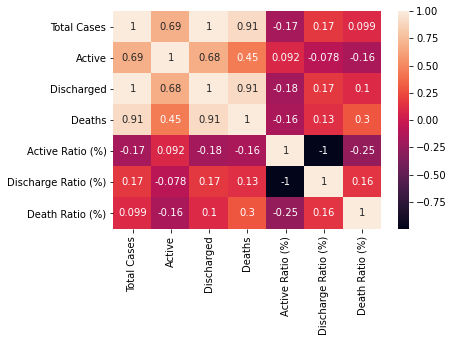

In [12]:
#Correlation matrix
sns.heatmap(df.corr(), annot=True)

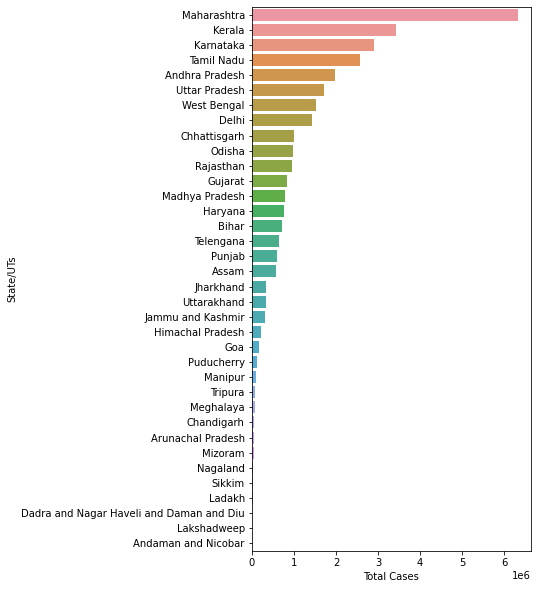

In [40]:
#Bar plot representation of states in descending order of total cases
plt.figure(figsize=(5,10))
df = df.sort_values(by=['Total Cases'],ascending=False)
sns.barplot(x=df['Total Cases'],y=df['State/UTs'])
plt.xlabel('Total Cases')
plt.ylabel('State/UTs')
plt.show()

In [14]:
#states with maximun and minimum cases
column = df['Total Cases']
print(f"Highest total cases are in {df.iloc[column.idxmax(),0]}")
print(f"Lowest total cases are in {df.iloc[column.idxmin(),0]}")

Highest total cases are in Maharashtra
Lowest total cases are in Andaman and Nicobar


### Highest total cases are in maharashtra

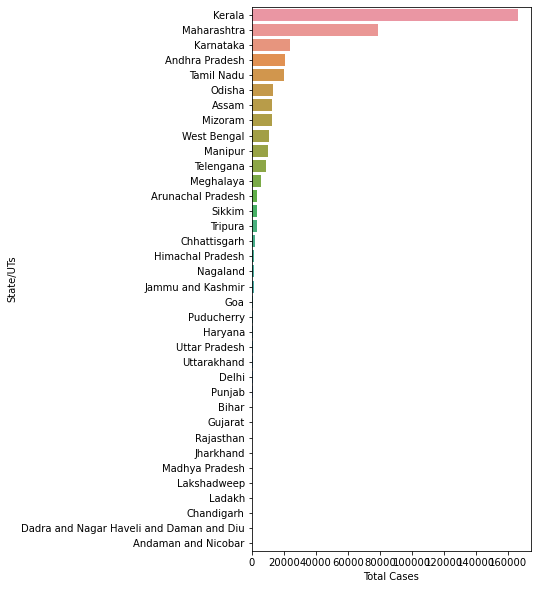

In [41]:
#Bar plot representation of states in descending order of active cases
plt.figure(figsize=(5,10))
df = df.sort_values(by=['Active'],ascending=False)
sns.barplot(x=df['Active'],y=df['State/UTs'])
plt.xlabel('Total Cases')
plt.ylabel('State/UTs')
plt.show()

In [16]:
#states with maximum and minimum active cases
column = df['Active']
print(f"Highest active cases are in {df.iloc[column.idxmax(),0]}")
print(f"Lowest active cases are in {df.iloc[column.idxmin(),0]}")

Highest active cases are in Kerala
Lowest active cases are in Andaman and Nicobar


### Highest active cases are in Kerala

<AxesSubplot:>

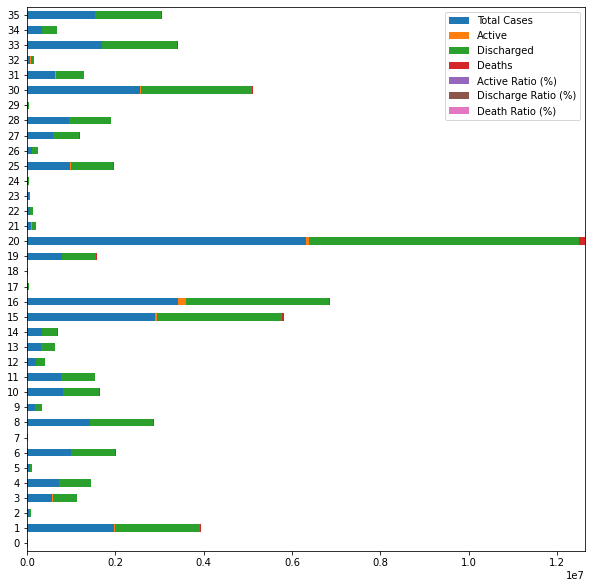

In [17]:
#bar plot representation of entire dataset
df.plot.barh(stacked=True,figsize=(10,10))

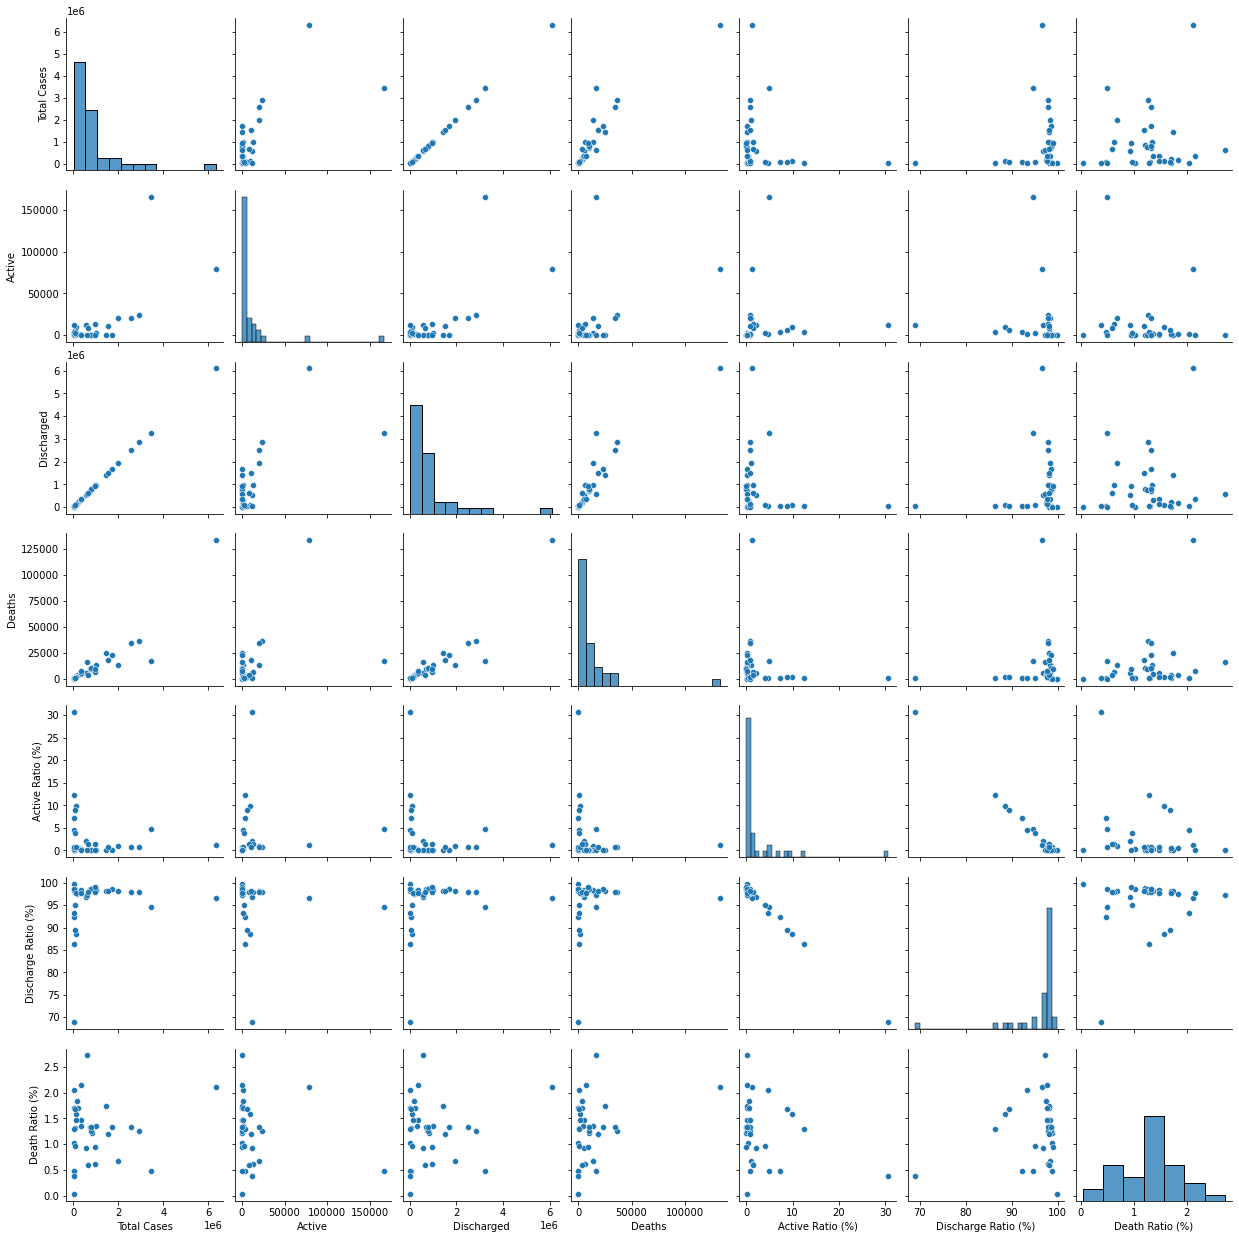

In [18]:
sns.pairplot(df)

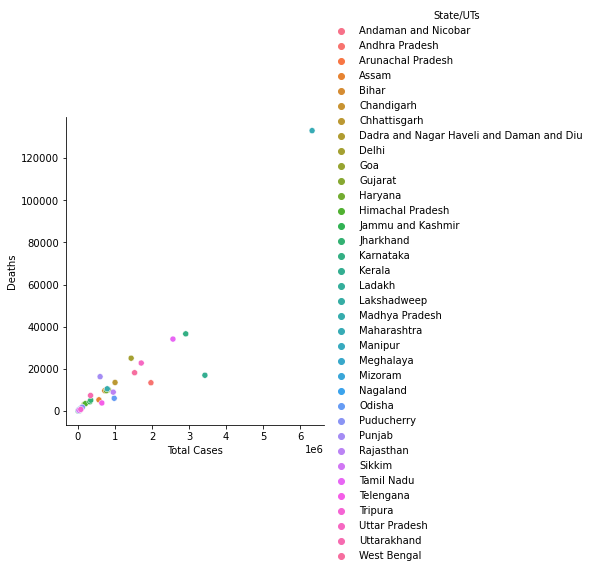

In [19]:
sns.relplot(x = 'Total Cases', y ='Deaths', hue = 'State/UTs', data = df)

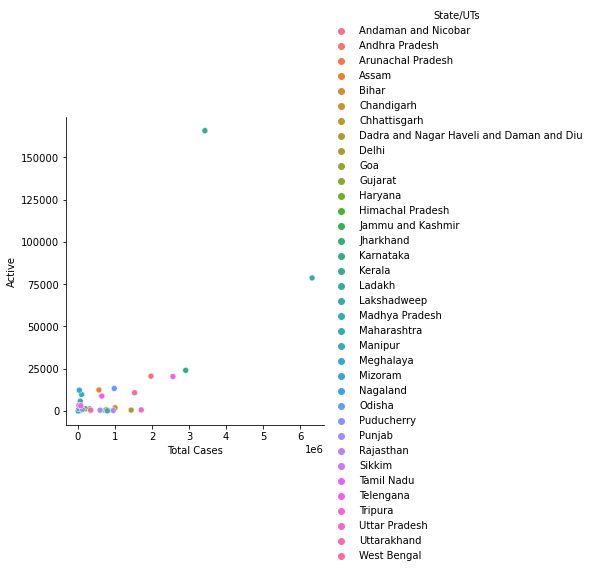

In [20]:
sns.relplot(x = 'Total Cases', y ='Active', hue = 'State/UTs', data = df)

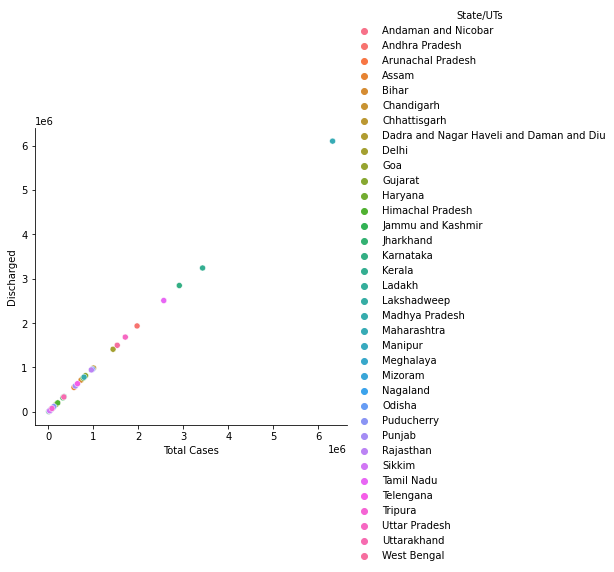

In [21]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = df)

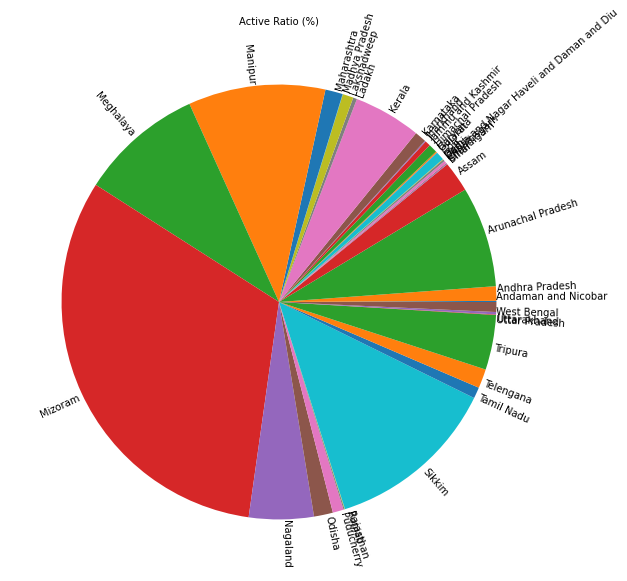

In [31]:
plt.figure(figsize=(15,10))
plt.pie(df['Active Ratio (%)'],labels=df['State/UTs'],rotatelabels=True,labeldistance=1)
plt.title('Active Ratio (%)',{'fontsize':10})
plt.show()

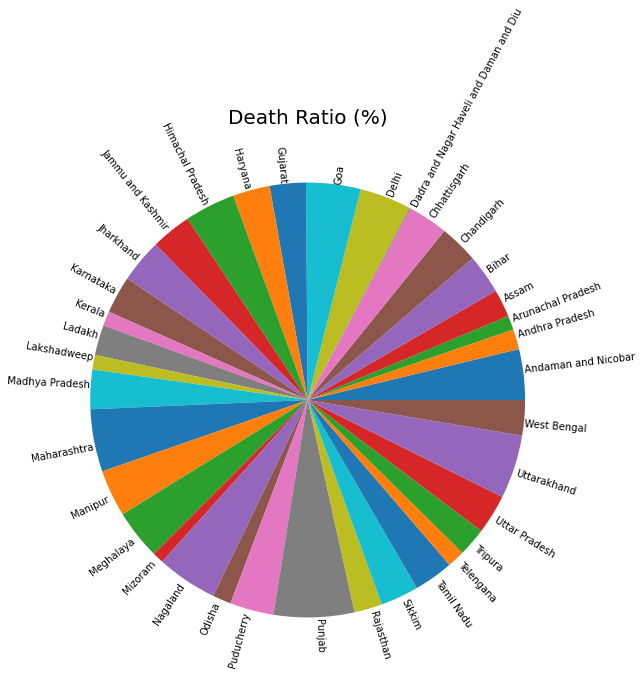

In [23]:
plt.figure(figsize=(15,10))
plt.pie(df['Death Ratio (%)'],labels=df['State/UTs'],rotatelabels=True,labeldistance=1)
plt.title('Death Ratio (%)',{'fontsize':20})
plt.show()

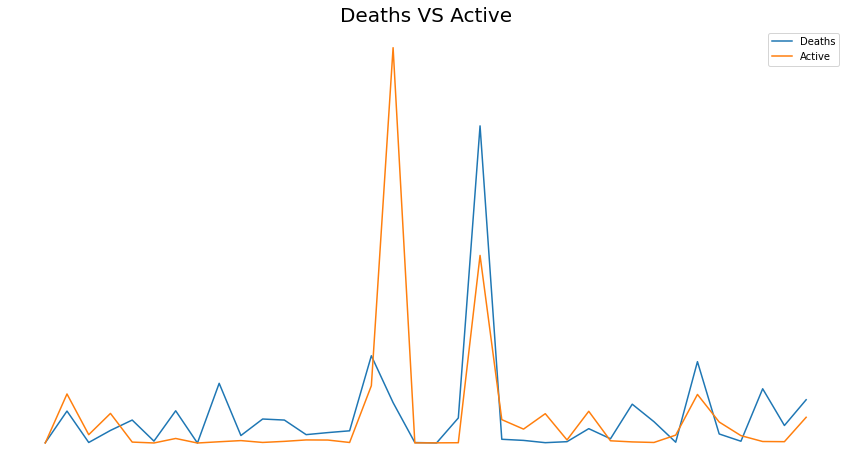

In [24]:
plt.figure(figsize=(15,8))
plt.plot(df['Deaths'])
plt.plot(df['Active'])
plt.legend(['Deaths','Active'])
plt.title('Deaths VS Active',{'fontsize':20})
plt.axis('off')
plt.show()

In [32]:
#Total active cases in country
df.Active.sum()

404958

In [33]:
#total deaths in country
df.Deaths.sum()

425195

### In India there are total of 4,04,958 Active Cases and 4,25,195 Deaths 